### Projeto Final Para Conclusão do Curso de Cientista de Dados

Instituição: Infnet

Aluno: Marcio Carvalho

Projeto: Predição da expectativa de vida no mundo de acordo diversos fatores de saúde e sócio econômicos.

Dados: O repositório de dados é da Global Health Observatory (GHO), portal de conjunto de dados da Organização Mundial da Saúde (OMS) para estatísticas relacionadas à saúde de 183 Estados Membros. Os dados econômicos correspondentes foram coletados do site das Nações Unidas. Inicialmente os respectivos dados foram coletados e organizados no Site: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who. pelo responsável KumarRajarshi.
             


Período: 2000-2015

As colunas a seguir estão incluídas no conjunto de dados:

• Country: país - 193 países

• year: Anos (2000 - 2015)

• Status: país desenvolvido ou em desenvolvimento

• Adult Mortality: Taxas de mortalidade adulta de ambos os sexos (probabilidade de morrer entre 15 e 60 anos por 1000 habitantes)

• infant Deaths: Número de óbitos infantis por 1.000 habitantes

• Alcohol: Álcool, consumo registrado per capita (15+) (em litros de álcool puro)

• percentage expenditure: Despesa percentual - Gastos com saúde como porcentagem do Produto Interno Bruto per capita (%)

• Hepatitis B: Cobertura vacinal contra hepatite B (HepB) em crianças de 1 ano (%)

• Measles: Sarampo - número de casos notificados por 1000 habitantes

• BMI: Índice de Massa Corporal Médio de toda a população

• under-five deathes: Número de mortes de menores de cinco anos por 1000 habitantes

• Polio: Cobertura vacinal contra pólio (Pol3) em crianças de 1 ano (%)

• Total expenditure: Despesas totais - Gastos do governo geral com saúde como porcentagem do gasto total do governo (%)

• Polio: Cobertura vacinal contra pólio (Pol3) em crianças de 1 ano (%)

• Diphtheria: Difteria - Cobertura vacinal contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano de idade (%)

• HIV/AIDS: Mortes por 1000 nascidos vivos HIV/AIDS (0-4 anos)

• GDP: Produto Interno Bruto per capita (em USD)

• Population: População do país

• thinness 1-19 years: Prevalência de magreza em crianças e adolescentes de 1 a 19 anos (%)

• thinness 5-9 years: Prevalência de magreza em crianças de 5 a 9 anos (%)

• Income composition of resources: Índice de Desenvolvimento Humano em termos de composição de renda dos recursos (índice variando de 0 a 1)

• Schooling: Número de anos de escolaridade (anos)

• Life Expectancy: Expectativa de vida em anos (coluna Alvo)


### Criação do Modelo de Predição

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn import (ensemble,preprocessing,tree)
from sklearn.model_selection import (train_test_split,StratifiedKFold)
from sklearn import model_selection
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (precision_score)
from sklearn.metrics import mean_squared_error
import xgboost
import seaborn as sns
warnings.filterwarnings('ignore')
import sklearn

In [104]:
df_full = pd.read_csv('Expectativa_de_vida_tratado.csv')

In [105]:
df_full.head(3)

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,...,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [6]:
df_des = df_full[df_full['Classificacao']=='Developed']
df_des.head(3)

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,...,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
112,Australia,2015,Developed,82.8,59.0,1,10.155333,0.00000,93.0,74,...,93.0,8.836667,93.0,0.1,56554.3876,23789338.0,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,6.0,1,9.710000,10769.36305,91.0,340,...,92.0,9.420000,92.0,0.1,62214.6912,2346694.0,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,61.0,1,9.870000,11734.85381,91.0,158,...,91.0,9.360000,91.0,0.1,67792.3386,23117353.0,0.6,0.6,0.933,20.3


In [7]:
df_emdes = df_full[df_full['Classificacao']=='Developing']
df_emdes.head(3)

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,...,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [8]:
print(df_full.shape)
print (df_des.shape)
print (df_emdes.shape)

(2928, 22)
(512, 22)
(2416, 22)


In [99]:
def preparacao(def_model):
   df_model = def_model.drop(columns=['PaIs','Ano'])
   df_model = pd.get_dummies(df_model,columns=['Classificacao'],drop_first=True)
   x = df_model.drop(columns='Expectativa_de_Vida')
   y = df_model.Expectativa_de_Vida
   return x , y

In [16]:
def treino_teste (X,Y,classe=0):
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=20) # stratify=X['coluna']
    return X_train, X_test, Y_train, Y_test

In [10]:
def normalizacao(X_train, X_test):
    scaler = preprocessing.StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_train_dfnorm = pd.DataFrame(X_train_norm,columns=X_train.columns)
    X_test_norm = scaler.transform(X_test)
    X_test_dfnorm = pd.DataFrame(X_test_norm,columns=X_train.columns)
    return X_train_norm , X_train_dfnorm , X_test_norm , X_test_dfnorm

In [46]:
def selecao(X_train , X_test , Y_train , Y_test): 
    X_rank = pd.concat([X_train, X_test])
    Y_rank = pd.concat([Y_train, Y_test])
    for model in [DummyRegressor,SVR,DecisionTreeRegressor,RandomForestRegressor,ensemble.GradientBoostingRegressor,MLPRegressor]:
      cls = model()
      kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=20 )
      s = model_selection.cross_val_score(cls, X_rank, Y_rank, scoring="neg_root_mean_squared_error", cv=kfold)
      print(f"{model.__name__:22} AUC: "f"{s.mean():.3f} STD: {s.std():.2f}")

In [ ]:
def modelo (x_train , y_train):
   param_grid = {
    'bootstrap': [True],
    'max_depth': [30],
    'max_features': [0.4],
    'min_samples_leaf': [1,2],
    'min_samples_split': [5,6],
    'n_estimators': [600,700],
    'random_state': [20],
   }
   rf = RandomForestRegressor()
   grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 10, n_jobs = -1, verbose = 3,scoring='neg_root_mean_squared_error')
   grid_search.fit(x_train, y_train)
   return grid_search

In [66]:
def metrica(y_test,x_test,model):
    metrica = mean_squared_error(y_test,model.predict(x_test),squared=False)
    return metrica

In [95]:
def importante (x_train,y_train):
   rf = ensemble.RandomForestRegressor(n_estimators=300, random_state=20) # melhor
   rf.fit(x_train, y_train)
   RandomForestRegressor(max_depth=40, max_features= 0.4,min_samples_leaf=3,   min_samples_split=8, n_jobs=None,verbose=0, warm_start=False)
   var_importante = []
   for col, val in sorted(zip(x_train.columns,rf.feature_importances_),  key=lambda x: x[1],reverse=True)[:5]: # explicar código
      var_importante.append( f"{col:10}{val:10.3f}")
   return var_importante, rf

In [100]:
x_full , y_full = preparacao (df_full)
x_des , y_des = preparacao (df_des)
x_emdes , y_emdes = preparacao (df_emdes)

In [101]:
X_train_full, X_test_full, Y_train_full, Y_test_full = treino_teste (x_full , y_full)
X_train_des, X_test_des, Y_train_des, Y_test_des = treino_teste (x_des , y_des)
X_train_emdes, X_test_emdes, Y_train_emdes, Y_test_emdes = treino_teste (x_emdes , y_emdes)
print(X_train_full.shape)
print (X_train_des.shape)
print (X_train_emdes.shape)

(2342, 19)
(409, 18)
(1932, 18)


In [21]:
X_train_norm_full , X_train_dfnorm_full , X_test_norm_full , X_test_dfnorm_full = normalizacao(X_train_full, X_test_full)
X_train_norm_des , X_train_dfnorm_des , X_test_norm_des , X_test_dfnorm_des = normalizacao(X_train_des, X_test_des)
X_train_norm_emdes, X_train_dfnorm_emdes, X_test_norm_emdes, X_test_dfnorm_emdes = normalizacao(X_train_emdes, X_test_emdes)

In [67]:
print("Dataset todos os países:")
selecao (X_train_dfnorm_full , X_test_dfnorm_full, Y_train_full, Y_test_full)
print(f" Dataset países desenvolvidos:")
selecao (X_train_dfnorm_des, X_test_dfnorm_des,Y_train_des, Y_test_des)
print(f" Dataset países em desenvolvimento:")
selecao(X_train_dfnorm_emdes, X_test_dfnorm_emdes,Y_train_emdes, Y_test_emdes)

Dataset todos os países
DummyRegressor         AUC: -9.523 STD: 0.27
SVR                    AUC: -3.451 STD: 0.22
DecisionTreeRegressor  AUC: -2.567 STD: 0.20
RandomForestRegressor  AUC: -1.800 STD: 0.16
GradientBoostingRegressor AUC: -2.232 STD: 0.15
MLPRegressor           AUC: -3.926 STD: 0.15
 Dataset países desenvolvidos
DummyRegressor         AUC: -3.911 STD: 0.39
SVR                    AUC: -2.294 STD: 0.31
DecisionTreeRegressor  AUC: -2.484 STD: 0.57
RandomForestRegressor  AUC: -1.706 STD: 0.23
GradientBoostingRegressor AUC: -1.852 STD: 0.22
MLPRegressor           AUC: -20.464 STD: 1.73
 Dataset países em desenvolvimento
DummyRegressor         AUC: -9.008 STD: 0.19
SVR                    AUC: -3.595 STD: 0.22
DecisionTreeRegressor  AUC: -2.615 STD: 0.20
RandomForestRegressor  AUC: -1.824 STD: 0.19
GradientBoostingRegressor AUC: -2.221 STD: 0.17
MLPRegressor           AUC: -5.861 STD: 0.19


In [56]:
modelo_full = modelo (X_train_norm_full,Y_train_full)
modelo_des = modelo (X_train_norm_des,Y_train_des)
modelo_emdes = modelo (X_train_norm_emdes,Y_train_emdes)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [50]:
print ('Melhores parâmetros dataset todos os países: \n', modelo_full.best_params_)
print('Melhores parâmetros dataset países desenvolvidos: \n' ,modelo_des.best_params_)
print('Melhores parâmetros dataset países emdesenvolvimento: \n' ,modelo_emdes.best_params_)

Melhores parâmetros dataset todos os países: 
 {'bootstrap': True, 'max_depth': 30, 'max_features': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 700, 'random_state': 20}
Melhores parâmetros dataset países desenvolvidos: 
 {'bootstrap': True, 'max_depth': 30, 'max_features': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 600, 'random_state': 20}
Melhores parâmetros dataset países emdesenvolvimento: 
 {'bootstrap': True, 'max_depth': 30, 'max_features': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 600, 'random_state': 20}


In [52]:
print ('Melhor pontuação dataset todos os países: \n', abs(modelo_full.best_score_))
print('Melhor pontuação dataset países desenvolvidos: \n', abs(modelo_des.best_score_))
print('Melhor pontuação dataset países em desenvolvimento: \n', abs(modelo_emdes.best_score_))

Melhor pontuação dataset todos os países: 
 1.8738278944068156
Melhor pontuação dataset países desenvolvidos: 
 1.7316358019409133
Melhor pontuação dataset países em desenvolvimento: 
 1.8185011418980424


In [62]:
metrica_full = metrica (Y_test_full,X_test_norm_full,modelo_full)
metrica_des = metrica (Y_test_des,X_test_norm_des,modelo_des)
metrica_emdes = metrica (Y_test_emdes,X_test_norm_emdes,modelo_emdes)

In [63]:
print ('Erro médio quadrático dataset todos os países: \n', metrica_full)
print('Erro médio quadrático países desenvolvidos: \n', metrica_des)
print('Erro médio quadrático países em desenvolvimento: \n', metrica_emdes)

Melhor pontuação dataset todos os países: 
 1.7018450030304975
Melhor pontuação dataset países desenvolvidos: 
 2.0705514319703013
Melhor pontuação dataset países em desenvolvimento: 
 1.9148608671825256


In [71]:
Y_pred_full = modelo_full.predict(X_test_norm_full)
results_full = pd.DataFrame(zip(Y_test_full, Y_pred_full, Y_test_full - Y_pred_full), columns = ['Expect-vida_real_todos','Expect-vida_prevista_todos','Erro'])
results_full[::50]

,Expect-vida_real_todos,Expect-vida_prevista_todos,Erro
0,79.0,79.147773,-0.147773
50,55.0,55.534304,-0.534304
100,62.1,62.344098,-0.244098
150,75.6,74.183752,1.416248
200,72.6,72.990001,-0.390001
250,66.8,65.481975,1.318025
300,56.2,55.264613,0.935387
350,54.9,53.255205,1.644795
400,73.3,72.798864,0.501136
450,49.6,53.408077,-3.808077


In [70]:
Y_pred_des = modelo_des.predict(X_test_norm_des)
results_des = pd.DataFrame(zip(Y_test_des, Y_pred_des, Y_test_des - Y_pred_des), columns = ['Expect-vida_real_desenvolvidos','Expect-vida_prevista_desenvolvidos','Erro'])
results_des[::10]

,Expect-vida_real_desenvolvidos,Expect-vida_prevista_desenvolvidos,Erro
0,82.9,80.262247,2.637753
10,75.0,75.167020,-0.167020
20,81.7,81.913188,-0.213188
30,82.7,79.649179,3.050821
40,76.7,75.445523,1.254477
50,71.1,72.406910,-1.306910
60,78.5,78.894696,-0.394696
70,81.8,82.489143,-0.689143
80,74.1,74.191610,-0.091610
90,86.0,81.211978,4.788022


In [74]:
Y_pred_emdes = modelo_emdes.predict(X_test_norm_emdes)
results_emdes = pd.DataFrame(zip(Y_test_emdes, Y_pred_emdes, Y_test_emdes - Y_pred_emdes), columns = ['Expect-vida_real_desenvolvidos','Expect-vida_prevista_desenvolvidos','Erro'])
results_emdes[::50]

,Expect-vida_real_desenvolvidos,Expect-vida_prevista_desenvolvidos,Erro
0,81.1,82.557681,-1.457681
50,65.7,66.268083,-0.568083
100,73.1,72.216047,0.883953
150,76.2,75.280860,0.919140
200,72.7,73.063726,-0.363726
250,55.4,55.874605,-0.474605
300,78.1,78.862424,-0.762424
350,55.0,55.373060,-0.373060
400,61.7,67.054905,-5.354905
450,72.5,71.892160,0.607840


In [97]:
importante_full, rf_full = importante (X_train_full,Y_train_full)
importante_des, rf_des = importante (X_train_des,Y_train_des)
importante_emdes, rf_emdes = importante (X_train_emdes,Y_train_emdes)

In [90]:
importante_full

['Mortes_criancas_0-4a_Hiv_aids     0.596',
 'IDH            0.179',
 'Taxa_Mortalidade_Adulto     0.121',
 'Indice_Massa_Corporal     0.018',
 'Anos_de_Escolaridade     0.016']

In [91]:
importante_des

['Taxa_Mortalidade_Adulto     0.461',
 'IDH            0.220',
 'Magreza_5-9anos     0.073',
 'Consumo_Alcool     0.045',
 'Magreza_1-19anos     0.042']

In [92]:
importante_emdes

['Mortes_criancas_0-4a_Hiv_aids     0.603',
 'Taxa_Mortalidade_Adulto     0.187',
 'IDH            0.080',
 'Indice_Massa_Corporal     0.027',
 'Anos_de_Escolaridade     0.020']

In [106]:
df_model = df_full.drop(columns=['PaIs','Ano'])
df_model = pd.get_dummies(df_model,columns=['Classificacao'],drop_first=True)
x = df_model.drop(columns='Expectativa_de_Vida')
y = df_model.Expectativa_de_Vida
X_train, X_test, Y_train, Y_test = treino_teste (x , y)
X_train_norm , X_train_dfnorm , X_test_norm , X_test_dfnorm = normalizacao(X_train, X_test)
modelo = modelo (X_train_norm,Y_train)
importante = importante (X_train,Y_train)
metrica = metrica (Y_test,X_test_norm,modelo)
print (importante)
metrica

TypeError: 'GridSearchCV' object is not callable

In [40]:
X_completo = scaler.transform(X)
yhat_completo = grid_search.predict(X_completo)

In [41]:
results = pd.DataFrame(zip(df['PaIs'],df['Ano'],Y, yhat_completo, Y - yhat_completo), columns = ['PaIs','Ano','Expectativa_completo_real', 'Expectativa_completo_previsto', 'Erro'])
results[::150]

,PaIs,Ano,Expectativa_completo_real,Expectativa_completo_previsto,Erro
0,Afghanistan,2015,65.0,62.234992,2.765008
150,Azerbaijan,2009,78.0,74.723982,3.276018
300,Bhutan,2003,63.3,63.253116,0.046884
450,Cabo Verde,2013,72.8,72.244087,0.555913
600,Comoros,2007,66.0,64.131614,1.868386
750,Denmark,2001,77.0,78.703965,-1.703965
900,Fiji,2011,69.2,69.698731,-0.498731
1050,Grenada,2005,71.5,72.504255,-1.004255
1200,Indonesia,2015,69.1,70.665328,-1.565328
1350,Kazakhstan,2009,67.8,67.895779,-0.095779


In [42]:
mean_squared_error(Y,grid_search.predict(X_completo),squared=False)

1.51012531167759

In [43]:
df.insert(4,'Expectativa_de_vida_prevista', yhat_completo)
df

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Expectativa_de_vida_prevista,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
0,Afghanistan,2015,Developing,65.0,62.234992,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,60.126158,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,60.296714,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,60.160376,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,59.907184,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,45.751896,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,45.469498,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,49.172764,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,47.000315,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


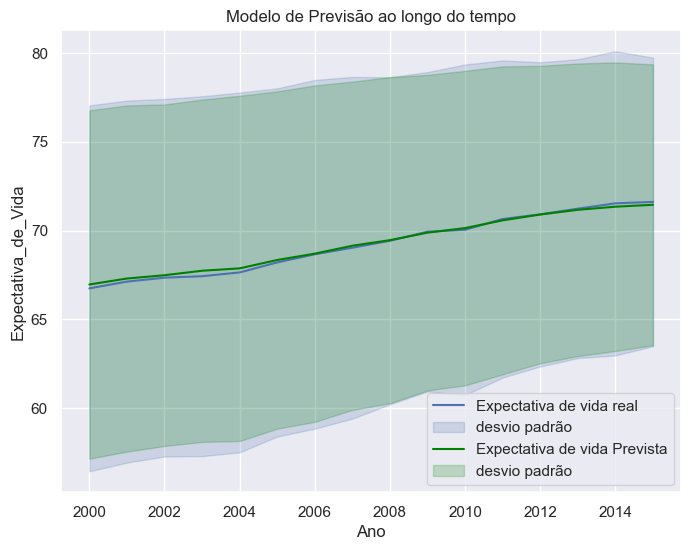

In [46]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(data=df,x='Ano', y='Expectativa_de_Vida',ci='sd')
ax = sns.lineplot(data=results,x='Ano', y='Expectativa_completo_previsto',color='Green',ci='sd')
# Inserindo descritivo na legenda
plt.legend(['Expectativa de vida real','desvio padrão',           'Expectativa de vida Prevista','desvio padrão'],loc=4) 
plt.title('Modelo de Previsão ao longo do tempo')
ax.get_figure().savefig("Previsão_Expectativa_de_vida.png")

In [ ]:
def preparacao(def_model):
   df_model = def_model.drop(columns=['PaIs','Ano','Expectativa_de_vida_prevista'])
   df_model = pd.get_dummies(df_model,columns=['Classificacao'])
   return df_model

In [ ]:
def separacao():
   X = df_model.drop(columns='Expectativa_de_Vida')
   Y = df_model.Expectativa_de_Vida
   return X,Y

In [ ]:
df_model_des = preparacao (df_final_des)
df_model_emdes = preparacao (df_final_emdes)

In [124]:
df_final_des = df_full_final[df_full_final['Classificacao']=='Developed']
df_final_emdes = df_full_final[df_full_final['Classificacao']=='Developing']

In [125]:
df_final_des

,PaIs,Ano,Classificacao,Expectativa_de_Vida,Expectativa_de_vida_prevista,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade
112,Australia,2015,Developed,82.8,82.706449,59.0,1,10.155333,0.00000,93.0,74,66.6,1,93.0,8.836667,93.0,0.1,56554.38760,23789338.0,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,82.574983,6.0,1,9.710000,10769.36305,91.0,340,66.1,1,92.0,9.420000,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,82.444405,61.0,1,9.870000,11734.85381,91.0,158,65.5,1,91.0,9.360000,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,82.474334,61.0,1,10.030000,11714.99858,91.0,199,65.0,1,92.0,9.360000,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,82.207483,63.0,1,10.300000,10986.26527,92.0,190,64.4,1,92.0,9.200000,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,77.453527,111.0,28,8.480000,0.00000,92.0,37,63.1,33,92.0,15.140000,96.0,0.1,13560.72386,1167660.0,0.7,0.6,0.862,15.8
2806,United States of America,2003,Developed,77.2,77.241945,114.0,28,8.400000,0.00000,92.0,56,62.4,33,91.0,15.600000,96.0,0.1,13560.72386,1167660.0,0.7,0.6,0.862,15.8
2807,United States of America,2002,Developed,77.0,77.162269,115.0,28,8.330000,0.00000,88.0,41,61.7,33,9.0,14.550000,94.0,0.1,13560.72386,1167660.0,0.8,0.6,0.862,15.8
2808,United States of America,2001,Developed,76.9,77.041082,115.0,28,8.250000,0.00000,89.0,116,6.9,33,89.0,13.730000,94.0,0.1,13560.72386,1167660.0,0.8,0.6,0.862,15.8


In [131]:
def tratamento(def_model):
   df_model = def_model.drop(columns=['PaIs','Ano','Expectativa_de_vida_prevista'])
   df_model = pd.get_dummies(df_model,columns=['Classificacao'])
   return df_model

In [ ]:
def separação 

In [132]:
df_model_des = tratamento (df_final_des)
df_model_emdes = tratamento (df_final_emdes)

In [ ]:
# para concluir

In [ ]:
def separacao():
   X = df_model.drop(columns='Expectativa_de_Vida')
   Y = df_model.Expectativa_de_Vida
   return X,Y

In [ ]:
var_X , var_Y = separacao ()

In [ ]:
var_X

In [128]:
df_model_des

,Expectativa_de_Vida,Taxa_Mortalidade_Adulto,Numero_Obito_Infantil,Consumo_Alcool,Gastos_Com_Saude,Hepatite_B,Sarampo,Indice_Massa_Corporal,Mortes_Menores_5anos,Cobertura_Polio,Relacao_GastosSaude/despesasTotais,Cobertura_Difeteria,Mortes_criancas_0-4a_Hiv_aids,PIB,Populacao,Magreza_1-19anos,Magreza_5-9anos,IDH,Anos_de_Escolaridade,Classificacao_Developed
112,82.8,59.0,1,10.155333,0.00000,93.0,74,66.6,1,93.0,8.836667,93.0,0.1,56554.38760,23789338.0,0.6,0.6,0.937,20.4,1
113,82.7,6.0,1,9.710000,10769.36305,91.0,340,66.1,1,92.0,9.420000,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4,1
114,82.5,61.0,1,9.870000,11734.85381,91.0,158,65.5,1,91.0,9.360000,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3,1
115,82.3,61.0,1,10.030000,11714.99858,91.0,199,65.0,1,92.0,9.360000,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1,1
116,82.0,63.0,1,10.300000,10986.26527,92.0,190,64.4,1,92.0,9.200000,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,77.5,111.0,28,8.480000,0.00000,92.0,37,63.1,33,92.0,15.140000,96.0,0.1,13560.72386,1167660.0,0.7,0.6,0.862,15.8,1
2806,77.2,114.0,28,8.400000,0.00000,92.0,56,62.4,33,91.0,15.600000,96.0,0.1,13560.72386,1167660.0,0.7,0.6,0.862,15.8,1
2807,77.0,115.0,28,8.330000,0.00000,88.0,41,61.7,33,9.0,14.550000,94.0,0.1,13560.72386,1167660.0,0.8,0.6,0.862,15.8,1
2808,76.9,115.0,28,8.250000,0.00000,89.0,116,6.9,33,89.0,13.730000,94.0,0.1,13560.72386,1167660.0,0.8,0.6,0.862,15.8,1


In [ ]:
X = df_model.drop(columns='Expectativa_de_Vida')
Y = df_model.Expectativa_de_Vida